In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 기본 정보 확인

In [3]:
df = pd.read_csv('./data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1. 행/열 수 확인
- 행: 271116개
- 열: 15개

In [4]:
df.shape

(271116, 15)

### 2. 각 변수 이름, 타입, 결측치 여부 확인
- 결측치가 있는 컬럼: Age, Height, Weight, Medal
    - Medal에 결측치가 있는 이유: 메달을 못 딴 경우 모두 빈 칸으로 남겨뒀기 때문

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  str    
 2   Sex     271116 non-null  str    
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  str    
 7   NOC     271116 non-null  str    
 8   Games   271116 non-null  str    
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  str    
 11  City    271116 non-null  str    
 12  Sport   271116 non-null  str    
 13  Event   271116 non-null  str    
 14  Medal   39783 non-null   str    
dtypes: float64(3), int64(2), str(10)
memory usage: 31.0 MB


### 3. 기술 통계 및 데이터 요약

#### 3-1. 수치형 변수
- 기술 통계 값이 의미 없는 ID와 Year는 제외하고 출력
- Age 컬럼의 경우 중앙값이 평균값보다 약간 작으므로 분포가 약간 우측으로 쏠려있음을 알 수 있다.
- Height 컬럼과 Weight 컬럼의 경우 중앙값과 평균값이 거의 같으므로 고르게 분포해있다는 것을 알 수 있다.

In [13]:
df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


#### 3-2 범주형 변수
- Name 컬럼을 확인해보니 선수의 이름이 중복된 경우가 많다는 것을 확인할 수 있다. 이는 한 선수가 여러 종목에 중복 참여했거나 여러 해 출전했다는 것을 알 수 있다. 동명이인일 가능성도 배재할 수 없지만, full name을 기재하였기 때문에 그 가능성은 다소 낮다고 볼 수 있다.
- Sex 컬럼의 결과 남자가 여자의 약 2.5배인 것을 확인할 수 있다.
- 팀이름을 나타내는 Team 컬럼과 국가 코드를 나타내는 NOC 코드의 unique 개수가 같을줄 알았는데, Team 컬럼을 확인해보니 올림픽 초창기에 있는 연합팀 제도 때문에 두 나라가 다 기재되는 등 정확한 국가명이 기재되어 있지 않았다. 주제에 맞는 컬럼은 국가 고유 코드를 나타내는 NOC 컬럼이다.
- 2000년에 개최된 올림픽이 참가한 선수가 가장 많았다.
- Season 컬럼을 확인해보니 하계올림픽에 참가한 사람이 동계올림픽보다 압도적으로 많았다.
- 경기가 가장 많이 열린 개최 도시는 런던이다. 1908년, 1948년, 2012년 총 3번 개최했기 때문이다.
- 육상 종목이 가장 많이 열렸다.
- 남자 축구 종목의 참여 선수가 가장 많았다.
- 금, 은, 동 중 금메달이 가장 많이 수여되었다.

In [20]:
df.describe(include='str')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


### 4. 각 컬럼 세부 정보

#### 4-1. Name
- 한 선수가 여러 종목을 참가하거나, 여러 해 참가한 것을 추정해볼 수 있다.

In [22]:
df.value_counts('Name')

Name
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Milan Zyka                       1
Yevgeny Aleksandrovich Zykov     1
James Francis "Jim" Zylker       1
Olga Igorevna Zyuzkova           1
Andrzej ya                       1
Name: count, Length: 134732, dtype: int64

#### 4-2. Sex
-

In [29]:
df.value_counts('Sex')

Sex
M    196594
F     74522
Name: count, dtype: int64

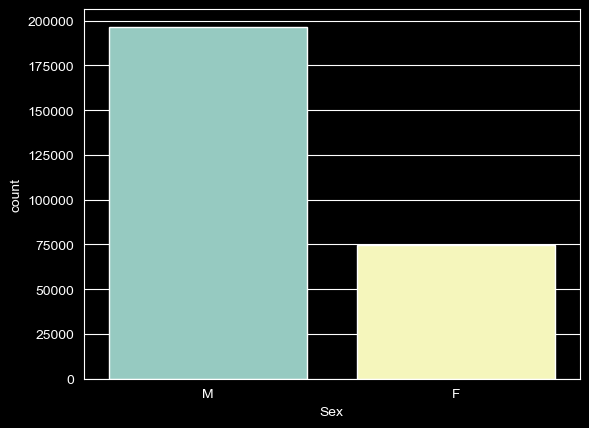

In [42]:
sns.countplot(x='Sex', data=df, hue='Sex')
plt.show()